### Read to xarray

In [1]:
import pandas as pd
import xarray as xr
from peak_resolver.process_chromeleon import *
from peak_resolver.read_to_dataset import *
import os
import re
import numpy as np


In [2]:
all_data = read_dataset_to_list('/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Experiment Results/')
df = read_list_to_ds(all_data)
df = df.set_index(['side', 'exp_time', 'run','Acetic', 'Propionic', 'Butyric', 'Valeric', 'Caproic','t'])
ds = df.to_xarray()
ds.to_netcdf("../2023-12-07.nc")

Re-gridding using tgrid [ 0.15        0.15328552  0.15657105 ... 19.84342895 19.84671448
 19.85      ]


In [3]:
ds

<xarray.Dataset>
Dimensions:    (side: 2, exp_time: 5, run: 3, Acetic: 2, Propionic: 2,
                Butyric: 2, Valeric: 2, Caproic: 2, t: 5997)
Coordinates:
  * side       (side) object 'F' 'R'
  * exp_time   (exp_time) float64 0.0 1.0 2.0 3.0 4.0
  * run        (run) int64 1 2 3
  * Acetic     (Acetic) int64 0 50
  * Propionic  (Propionic) int64 0 50
  * Butyric    (Butyric) int64 0 50
  * Valeric    (Valeric) int64 0 50
  * Caproic    (Caproic) int64 0 50
  * t          (t) float64 0.15 0.1533 0.1566 0.1599 ... 19.84 19.84 19.85 19.85
Data variables:
    index      (side, exp_time, run, Acetic, Propionic, Butyric, Valeric, Caproic, t) float64 ...
    s          (side, exp_time, run, Acetic, Propionic, Butyric, Valeric, Caproic, t) float64 ...
    ds         (side, exp_time, run, Acetic, Propionic, Butyric, Valeric, Caproic, t) float64 ...
    d2s        (side, exp_time, run, Acetic, Propionic, Butyric, Valeric, Caproic, t) float64 ...

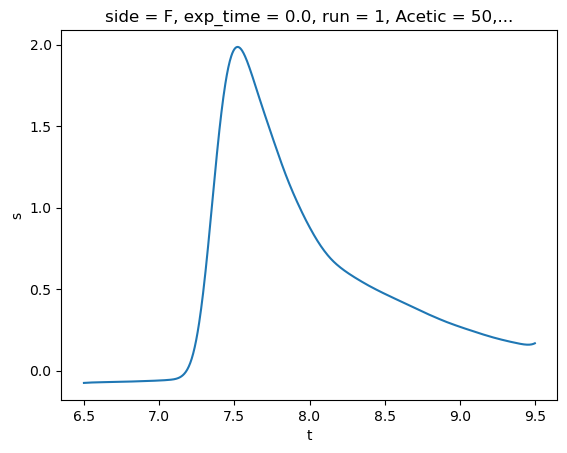

In [8]:
one = ds.sel(Acetic=50, Propionic=50, Valeric=50, Caproic=50, Butyric=50, side='F',exp_time=0.0, run=1)['s']
one = one.where(one.coords['t'] > 6.5).where(one.coords['t'] < 9.5).dropna(dim='t')
one.plot()
plt.show()